In [88]:
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [89]:
iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names )
targets = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
df.shape

(150, 4)

In [91]:
scaler = StandardScaler()
normalized_iris = scaler.fit_transform(df)
df = pd.DataFrame(data = normalized_iris, columns = iris.feature_names)

In [92]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [93]:
slength = normalized_iris[:,0]
swidth = normalized_iris[:,1]
plength = normalized_iris[:,2]
pwidth = normalized_iris[:,3]
feature_arr = [slength, swidth, plength, pwidth]
var_arr = []
for i in range(len(feature_arr)):
    calc_var = np.var(feature_arr[i])
    var_arr.append(calc_var)
var_arr

[1.0, 1.0000000000000009, 0.9999999999999998, 1.0000000000000002]

In [94]:
covariance_mat = np.cov(df.T)

In [95]:
covariance_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [96]:
#Calculating Eigenvector And EigenValues
eigenvalues, eigenvectors = np.linalg.eig(covariance_mat)
print(eigenvalues)
print(eigenvectors)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [97]:
#Finding Proportion of variance
tot = eigenvalues.sum()
pov = (eigenvalues/tot) * 100
pov

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [98]:
#Change of basis (Y = PX)
P = eigenvectors.copy()
X = df.T
print(P.shape)
print(X.shape)
Y = np.matmul(P.T,X)
Y

(4, 4)
(4, 150)


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-2.264703,-2.080961,-2.364229,-2.299384,-2.389842,-2.075631,-2.444029,-2.232847,-2.334640,-2.184328,...,2.014810,1.901784,1.157882,2.040558,1.998147,1.870503,1.564580,1.521170,1.372788,0.960656
1,-0.480027,0.674134,0.341908,0.597395,-0.646835,-1.489178,-0.047644,-0.223148,1.115328,0.469014,...,-0.613886,-0.689575,0.698870,-0.867521,-1.049169,-0.386966,0.896687,-0.269069,-1.011254,0.024332
2,-0.127706,-0.234609,0.044201,0.091290,0.015738,0.026968,0.335470,-0.088695,0.145077,-0.253766,...,0.428333,0.130075,0.530160,0.338144,0.632413,0.256274,-0.026371,0.180178,0.933395,0.528249
3,0.024168,0.103007,0.028377,-0.065956,-0.035923,0.006608,-0.036776,-0.024612,-0.026859,-0.039899,...,0.247538,0.469697,-0.040521,0.045187,0.214045,0.389257,0.220192,0.119171,0.026129,-0.163078


In [99]:
Y.shape

(4, 150)

In [13]:
cov_y = np.cov(Y)
print(cov_y)
print("As you can see the diagonal elements are dominant and non-diagonal elements are almost 0")

[[ 2.93808505e+00  4.96084344e-16  5.29032448e-17  5.34807098e-16]
 [ 4.96084344e-16  9.20164904e-01 -5.92879586e-16  3.01457684e-16]
 [ 5.29032448e-17 -5.92879586e-16  1.47741821e-01 -2.94414008e-16]
 [ 5.34807098e-16  3.01457684e-16 -2.94414008e-16  2.08538622e-02]]
As you can see the diagonal elements are dominant and non-diagonal elements are almost 0


In [14]:
def PCAAnalysis(set):
    print("Subset: ", set)
    print("No of principle components: ", len(set))
    neweig = eigenvectors[:,set]
    # print(neweig.shape)
    # print(X.shape)
    mat = np.matmul(neweig.T,X)
    covariance_calc = np.cov(mat)
    print("Covariance for this subset is: ")
    print(covariance_calc)
    return mat



Subset:  [0]
No of principle components:  1
Covariance for this subset is: 
2.9380850501999953


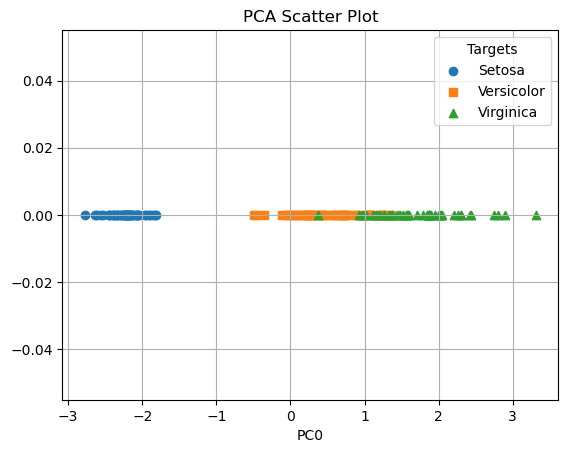

In [80]:
#Taking Only 1 Principle Component
Plot_mat = PCAAnalysis([0]).T
target_names = ['Setosa','Versicolor', 'Virginica']
# print(target_names)
# print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class
# print(Plot_mat)
# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[mask], [0] * len(Plot_mat[0][mask]), marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC0')
plt.grid()
plt.title('PCA Scatter Plot')


# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0].png')

plt.show()


Subset:  [3]
No of principle components:  1
Covariance for this subset is: 
0.020853862176462283


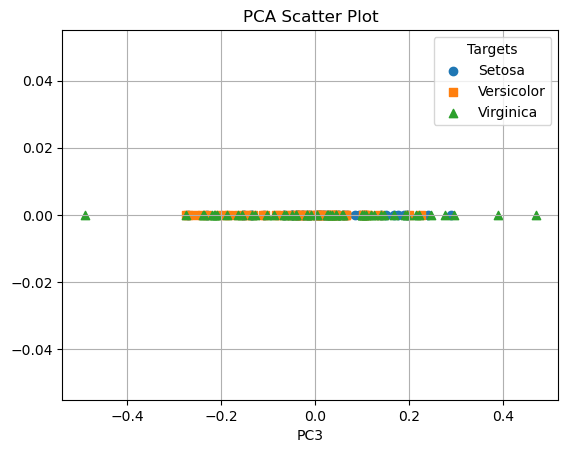

In [100]:
#Taking Only 1 Principle Component
Plot_mat = PCAAnalysis([3]).T
target_names = ['Setosa','Versicolor', 'Virginica']
# print(target_names)
# print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class
# print(Plot_mat)
# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[mask], [0] * len(Plot_mat[0][mask]), marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC3')
plt.grid()
plt.title('PCA Scatter Plot')


# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[3].png')


plt.show()

Subset:  [0, 1]
No of principle components:  2
Covariance for this subset is: 
[[2.93808505e+00 4.42435983e-16]
 [4.42435983e-16 9.20164904e-01]]


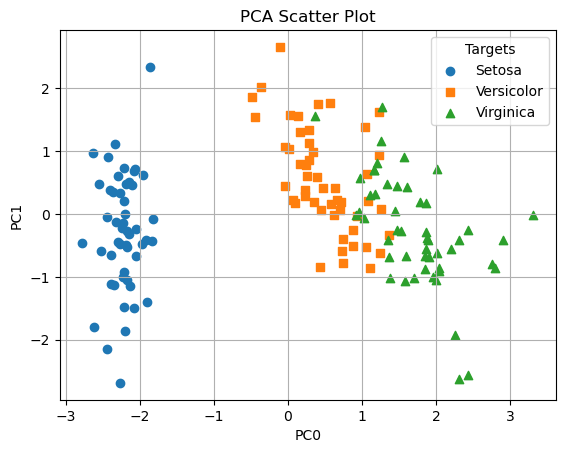

In [82]:
#Taking Only 2 Principle Component
Plot_mat = PCAAnalysis([0,1]).T
Plot_mat = np.asarray(Plot_mat)


# # Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# # Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[:, 0][mask],Plot_mat[:, 1][mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC0')
plt.ylabel('PC1')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0,1].png')


plt.show()

Subset:  [1, 2]
No of principle components:  2
Covariance for this subset is: 
[[ 9.20164904e-01 -5.92879586e-16]
 [-5.92879586e-16  1.47741821e-01]]


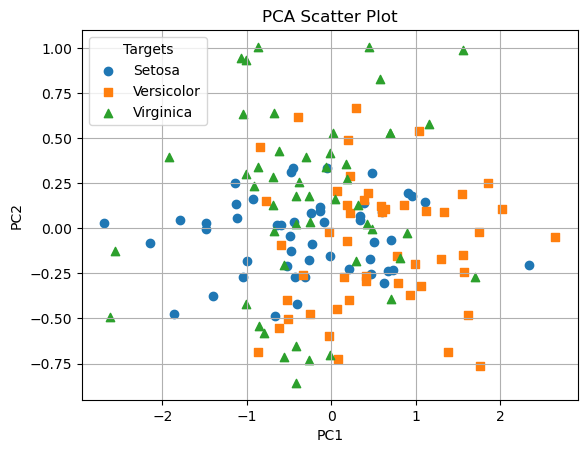

In [83]:
#Taking Only 2 Principle Component
Plot_mat = PCAAnalysis([1,2])
Plot_mat = np.asarray(Plot_mat)


# print(Plot_mat[0].shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[0][mask],Plot_mat[1][mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[1,2].png')


plt.show()

Subset:  [2, 3]
No of principle components:  2
Covariance for this subset is: 
[[ 1.47741821e-01 -2.94414008e-16]
 [-2.94414008e-16  2.08538622e-02]]
(2, 150)


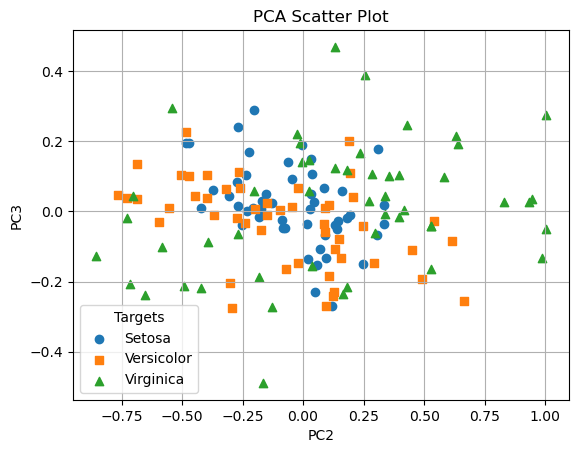

In [84]:
#Taking Only 2 Principle Component
Plot_mat = PCAAnalysis([2,3])
Plot_mat = np.asarray(Plot_mat)

print(Plot_mat.shape)
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = plt.scatter(Plot_mat[0][mask],Plot_mat[1][mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[2,3].png')


plt.show()

Subset:  [0, 1, 2]
No of principle components:  3
Covariance for this subset is: 
[[ 2.93808505e+00  4.42435983e-16  5.29032448e-17]
 [ 4.42435983e-16  9.20164904e-01 -5.92879586e-16]
 [ 5.29032448e-17 -5.92879586e-16  1.47741821e-01]]


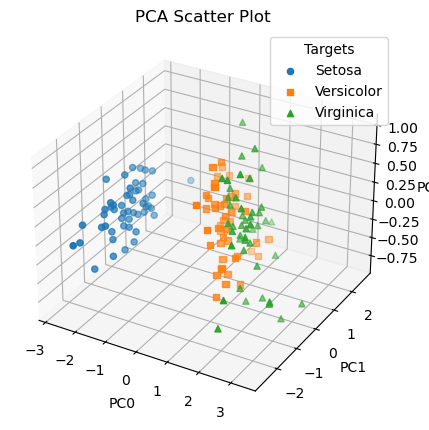

In [85]:
#Taking Only 3 Principle Component
Plot_mat = PCAAnalysis([0,1,2]).T
Plot_mat = np.asarray(Plot_mat)

# print(Plot_mat.shape) 
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
a = Plot_mat[:, 0]
b = Plot_mat[:, 1]
c = Plot_mat[:, 2]

scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = ax.scatter(a[mask],b[mask], c[mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0,1,2].png')


plt.show()

Subset:  [1, 2, 3]
No of principle components:  3
Covariance for this subset is: 
[[ 9.20164904e-01 -5.92879586e-16  3.01457684e-16]
 [-5.92879586e-16  1.47741821e-01 -2.94414008e-16]
 [ 3.01457684e-16 -2.94414008e-16  2.08538622e-02]]


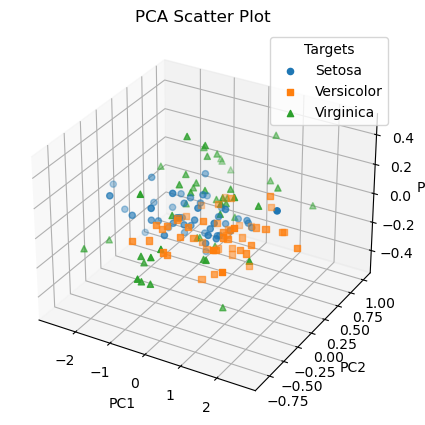

In [86]:
#Taking Only 3 Principle Component
Plot_mat = PCAAnalysis([1,2,3]).T
Plot_mat = np.asarray(Plot_mat)

# print(Plot_mat.shape) 
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
a = Plot_mat[:, 0]
b = Plot_mat[:, 1]
c = Plot_mat[:, 2]

scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = ax.scatter(a[mask],b[mask], c[mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[1,2,3].png')


plt.show()

Subset:  [0, 2, 3]
No of principle components:  3
Covariance for this subset is: 
[[ 2.93808505e+00  5.29032448e-17  5.34807098e-16]
 [ 5.29032448e-17  1.47741821e-01 -2.94414008e-16]
 [ 5.34807098e-16 -2.94414008e-16  2.08538622e-02]]


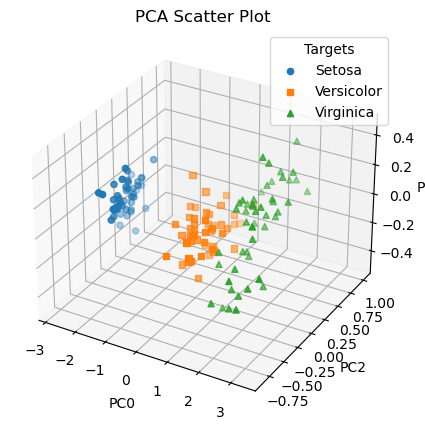

In [87]:
#Taking Only 3 Principle Component
Plot_mat = PCAAnalysis([0,2,3]).T
Plot_mat = np.asarray(Plot_mat)

# print(Plot_mat.shape) 
# Define marker styles for each class
marker_styles = ['o', 's', '^']  # Use different markers for each class

# Plot the scatter plot with different markers
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
a = Plot_mat[:, 0]
b = Plot_mat[:, 1]
c = Plot_mat[:, 2]

scatter_handles = []
for label in set(targets):
    mask = [t == label for t in targets]
    scatter = ax.scatter(a[mask],b[mask], c[mask], marker=marker_styles[label], label=target_names[label])
    scatter_handles.append(scatter)

ax.set_xlabel('PC0')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# plt.axis('equal')
plt.grid()
plt.title('PCA Scatter Plot')

# Add legend
plt.legend(handles=scatter_handles, title='Targets')
plt.savefig('[0,2,3].png')


# plt.tight_layout()

plt.show()